<a href="https://colab.research.google.com/github/Elyz-ra/Sistem-Rekomendasi-Penjurusan-SMA/blob/main/Sistem_Rekomendasi_penjurusan_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Deskripsi Dataset

Dataset ini berisi informasi nilai akademik dari 608 siswa SMPN 2 Wungu yang telah lulus antara tahun 2021 hingga 2023. Setiap baris dalam dataset merepresentasikan satu siswa, dengan kolom-kolom yang mencakup data identitas serta nilai akademik pada berbagai mata pelajaran selama enam semester (kelas 7 hingga kelas 9 SMP).

Data ini diperoleh dari buku induk siswa, yang merupakan arsip resmi sekolah mengenai pencapaian akademik tiap peserta didik.

Berikut adalah struktur kolom dalam dataset:

| No. | Kategori           | Nama Kolom                        | Jumlah Kolom |
|-----|--------------------|-----------------------------------|--------------|
| 1   | Identitas Siswa    | Nama, NIS, Absen, Ekstrakurikuler | 4            |
| 2   | Pendidikan Agama   | Agama1 - Agama6                   | 6            |
| 3   | PPKn               | PKN1 - PKN6                       | 6            |
| 4   | Bahasa Indonesia   | Indo1 - Indo6                     | 6            |
| 5   | Matematika         | Mate1 - Mate6                     | 6            |
| 6   | IPA                | IPA1 - IPA6                       | 6            |
| 7   | IPS                | IPS1 - IPS6                       | 6            |
| 8   | Bahasa Inggris     | Inggris1 - Inggris6               | 6            |
| 9   | Seni Budaya        | Senbud1 - Senbud6                 | 6            |
| 10  | PJOK               | PJOK1 - PJOK6                     | 6            |
| 11  | Prakarya           | Prakarya1 - Prakarya6             | 6            |
| 12  | Bahasa Daerah      | B_Daerah1 - B_Daerah6             | 6            |
|     | **Total**          |                                   | **70**       |


#2. Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import linregress
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

#3. Memuat Dataset

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRxbz3oIGpsWYx-0ZW5vXA2TMO2TxzZkgwYVZSeTJkHoXJBhXzyhbc6bQw47vuB8Asq5TRXlKUGVvkp/pub?output=csv'
df = pd.read_csv(url)

df.head()


,Nama,NIS,Absen,Ekstrakurikuler,Agama1,Agama2,Agama3,Agama4,Agama5,Agama6,...,Prakarya3,Prakarya4,Prakarya5,Prakarya6,B_Daerah1,B_Daerah2,B_Daerah3,B_Daerah4,B_Daerah5,B_Daerah6
0,ADYTIA OKY ROMADONA,6160,12,Pramuka,76,82,72.0,78.0,72.0,81.0,...,76.0,77.0,73.0,76.0,74,65,67.0,72.0,74.0,77.0
1,AHMAD KHORINI,6161,12,"Pramuka, Keagamaan",78,82,80.0,80.0,74.0,81.0,...,74.0,76.0,70.0,76.0,69,72,69.0,69.0,71.0,76.0
2,AHMAT PUTRA ADITIA,6162,46,"Pramuka, Keagamaan",76,77,70.0,78.0,72.0,80.0,...,78.0,78.0,71.0,72.0,71,66,70.0,68.0,71.0,71.0
3,AIKA SALSABILLA,6163,18,"Pramuka, Keagamaan",80,81,75.0,78.0,83.0,84.0,...,80.0,81.0,77.0,78.0,74,73,68.0,72.0,74.0,80.0
4,AJENG APRILIA,6164,5,Pramuka,80,90,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67,67,NaN,NaN,NaN,NaN


#4. Exploratory Data Analysis

Missing Value & Duplicated Data

In [3]:
df.isna().sum()

,0
Nama,0
NIS,0
Absen,0
Ekstrakurikuler,4
Agama1,0
...,...
B_Daerah2,0
B_Daerah3,2
B_Daerah4,4
B_Daerah5,4


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop_duplicates()
df.head()

,Nama,NIS,Absen,Ekstrakurikuler,Agama1,Agama2,Agama3,Agama4,Agama5,Agama6,...,Prakarya3,Prakarya4,Prakarya5,Prakarya6,B_Daerah1,B_Daerah2,B_Daerah3,B_Daerah4,B_Daerah5,B_Daerah6
0,ADYTIA OKY ROMADONA,6160,12,Pramuka,76,82,72.0,78.0,72.0,81.0,...,76.0,77.0,73.0,76.0,74,65,67.0,72.0,74.0,77.0
1,AHMAD KHORINI,6161,12,"Pramuka, Keagamaan",78,82,80.0,80.0,74.0,81.0,...,74.0,76.0,70.0,76.0,69,72,69.0,69.0,71.0,76.0
2,AHMAT PUTRA ADITIA,6162,46,"Pramuka, Keagamaan",76,77,70.0,78.0,72.0,80.0,...,78.0,78.0,71.0,72.0,71,66,70.0,68.0,71.0,71.0
3,AIKA SALSABILLA,6163,18,"Pramuka, Keagamaan",80,81,75.0,78.0,83.0,84.0,...,80.0,81.0,77.0,78.0,74,73,68.0,72.0,74.0,80.0
4,AJENG APRILIA,6164,5,Pramuka,80,90,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67,67,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()
df.head()

,Nama,NIS,Absen,Ekstrakurikuler,Agama1,Agama2,Agama3,Agama4,Agama5,Agama6,...,Prakarya3,Prakarya4,Prakarya5,Prakarya6,B_Daerah1,B_Daerah2,B_Daerah3,B_Daerah4,B_Daerah5,B_Daerah6
0,ADYTIA OKY ROMADONA,6160,12,Pramuka,76,82,72.0,78.0,72.0,81.0,...,76.0,77.0,73.0,76.0,74,65,67.0,72.0,74.0,77.0
1,AHMAD KHORINI,6161,12,"Pramuka, Keagamaan",78,82,80.0,80.0,74.0,81.0,...,74.0,76.0,70.0,76.0,69,72,69.0,69.0,71.0,76.0
2,AHMAT PUTRA ADITIA,6162,46,"Pramuka, Keagamaan",76,77,70.0,78.0,72.0,80.0,...,78.0,78.0,71.0,72.0,71,66,70.0,68.0,71.0,71.0
3,AIKA SALSABILLA,6163,18,"Pramuka, Keagamaan",80,81,75.0,78.0,83.0,84.0,...,80.0,81.0,77.0,78.0,74,73,68.0,72.0,74.0,80.0
5,ANDIKA YUWANDA,6165,6,"Pramuka, Keagamaan",76,72,70.0,77.0,73.0,81.0,...,70.0,73.0,71.0,71.0,67,66,67.0,71.0,71.0,73.0


Eksplorasi data distribusi

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 0 to 606
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nama             599 non-null    object 
 1   NIS              599 non-null    int64  
 2   Absen            599 non-null    int64  
 3   Ekstrakurikuler  599 non-null    object 
 4   Agama1           599 non-null    int64  
 5   Agama2           599 non-null    int64  
 6   Agama3           599 non-null    float64
 7   Agama4           599 non-null    float64
 8   Agama5           599 non-null    float64
 9   Agama6           599 non-null    float64
 10  PKN1             599 non-null    int64  
 11  PKN2             599 non-null    int64  
 12  PKN3             599 non-null    float64
 13  PKN4             599 non-null    float64
 14  PKN5             599 non-null    float64
 15  PKN6             599 non-null    float64
 16  Indo1            599 non-null    int64  
 17  Indo2            599 

In [8]:
df.shape

(599, 70)

In [9]:
df['NIS'].nunique()

597

In [10]:
df['Absen'].describe()

,Absen
count,599.000000
mean,10.247078
std,10.658693
min,0.000000
25%,3.000000
50%,7.000000
75%,14.000000
max,71.000000


In [11]:
df['Ekstrakurikuler'].value_counts()

,count
Ekstrakurikuler,
"Pramuka, Keagamaan",500
Pramuka,42
"Pramuka, PMR, Keagamaan",14
"Pramuka, Olah Raga, Keagamaan",14
"Pramuka, K. Ilmiah, Keagamaan",7
"Pramuka, PMR",6
"Pramuka, KEL. Ilmiah, Keagamaan",3
Keagamaan,2
"Pramuka, BHS Asing, Keagamaan",2


Corelation Matrix

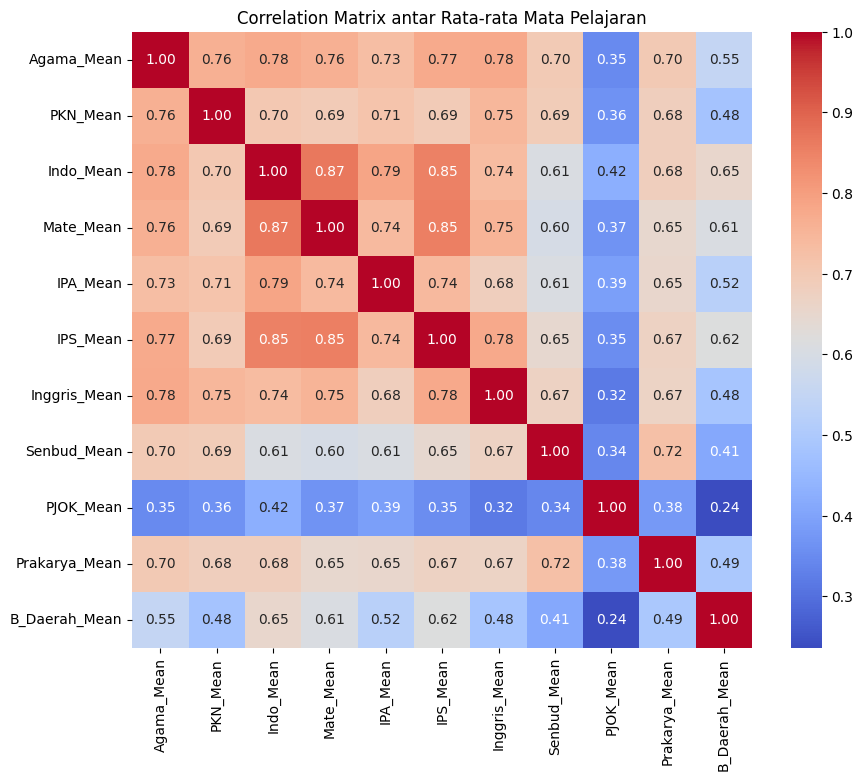

In [12]:
subjects = ['Agama', 'PKN', 'Indo', 'Mate', 'IPA', 'IPS', 'Inggris', 'Senbud', 'PJOK', 'Prakarya', 'B_Daerah']

# Menghitung rata-rata setiap mata pelajaran
for subject in subjects:
    subject_cols = [col for col in df.columns if col.startswith(subject)]
    df[f'{subject}_Mean'] = df[subject_cols].mean(axis=1)

mean_cols = [f'{subject}_Mean' for subject in subjects]

correlation_matrix = df[mean_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix antar Rata-rata Mata Pelajaran')
plt.show()

Boxplot

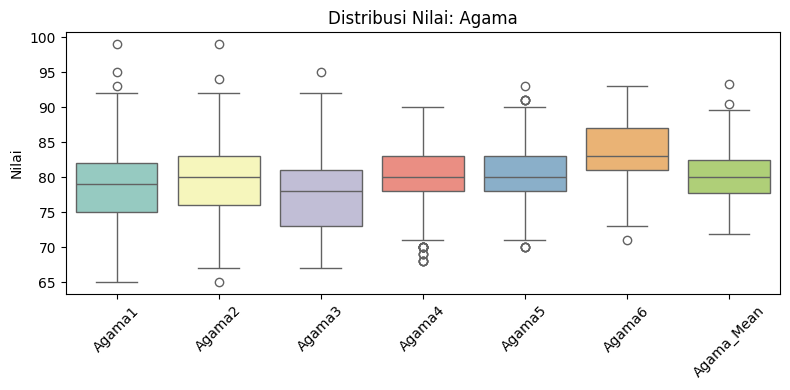

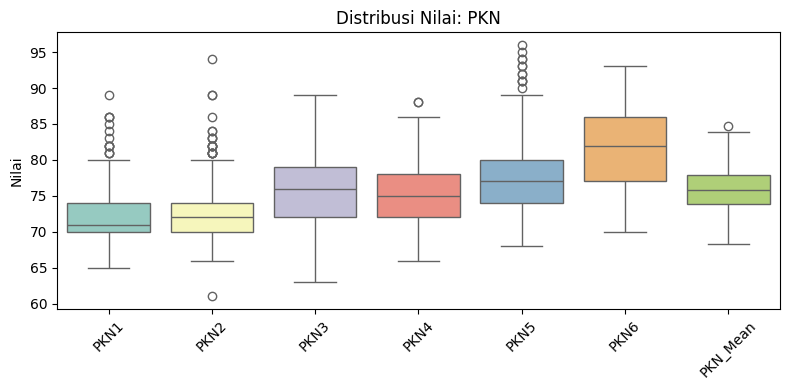

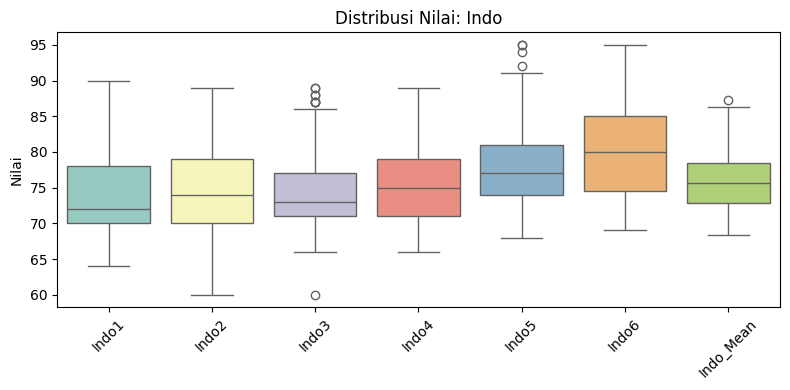

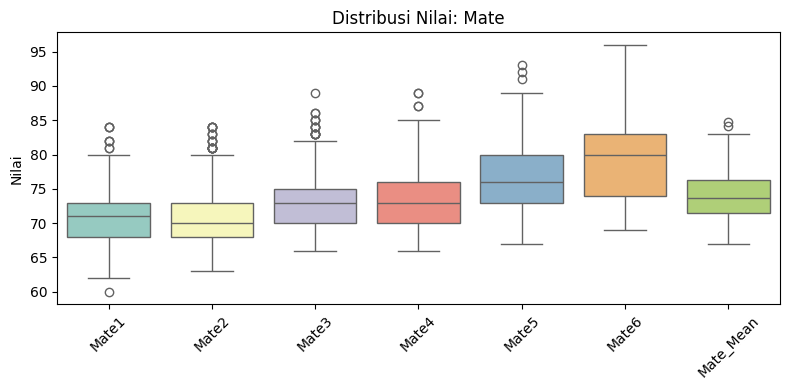

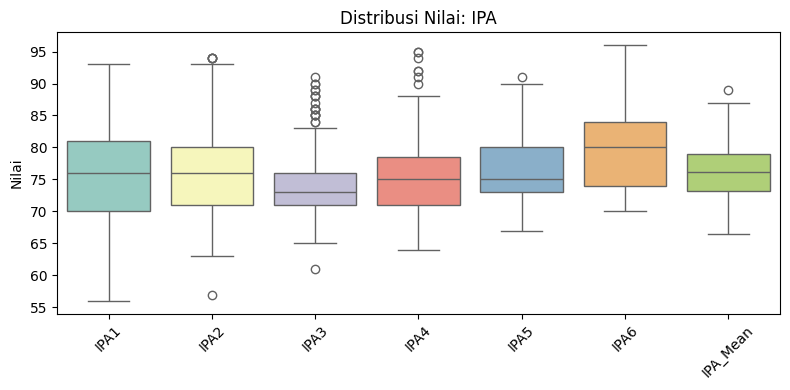

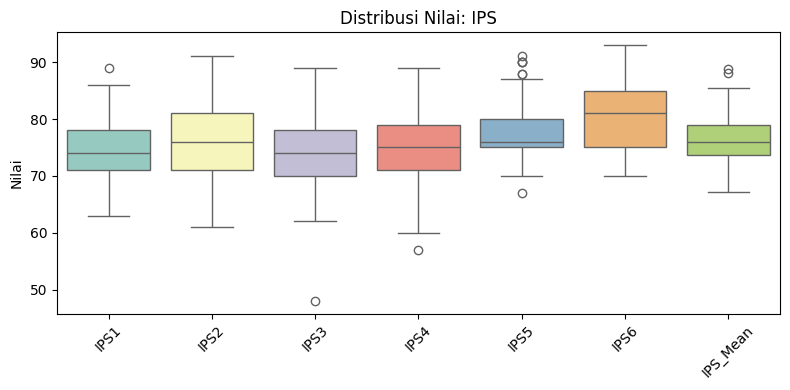

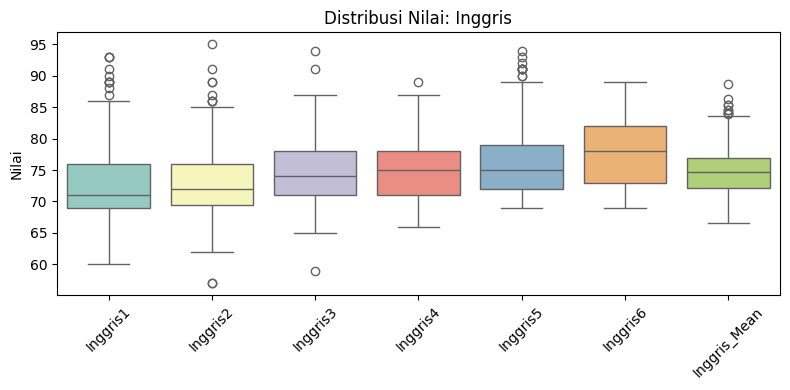

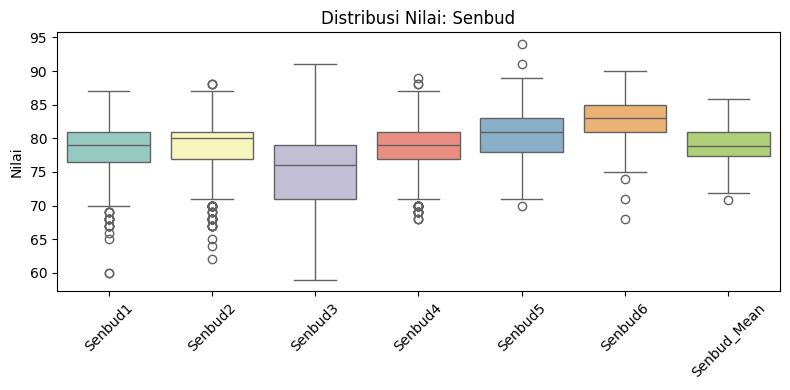

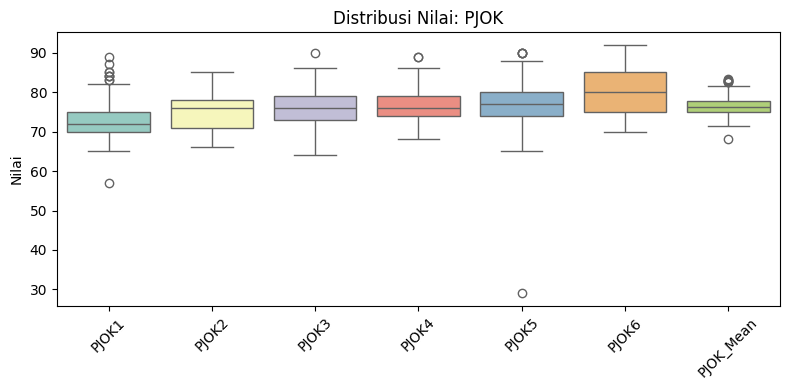

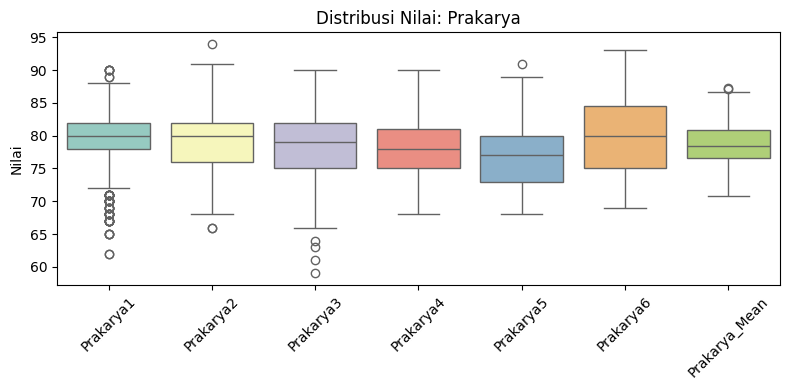

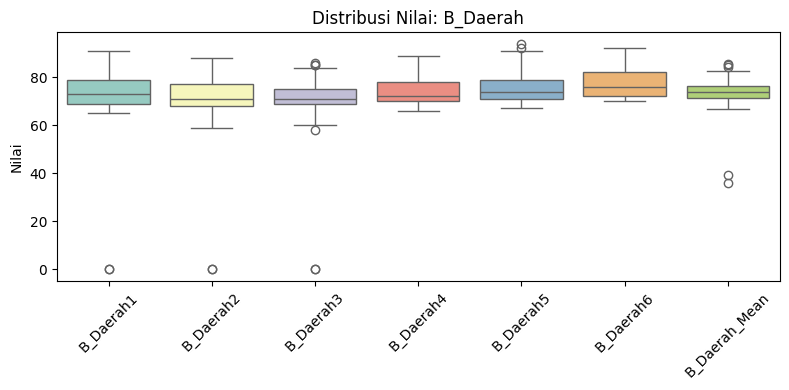

In [13]:
for subject in subjects:
    cols = [col for col in df.columns if col.startswith(subject)]

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[cols], palette='Set3')
    plt.title(f'Distribusi Nilai: {subject}')
    plt.ylabel('Nilai')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Histogram

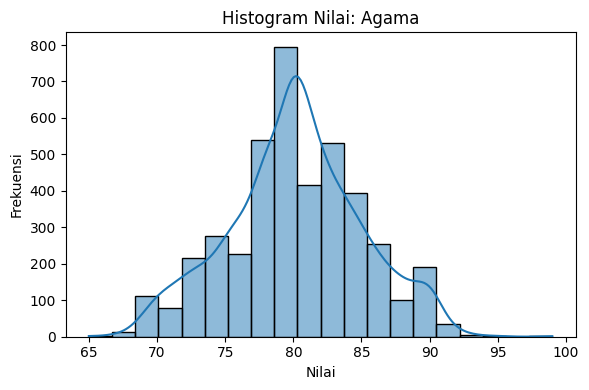

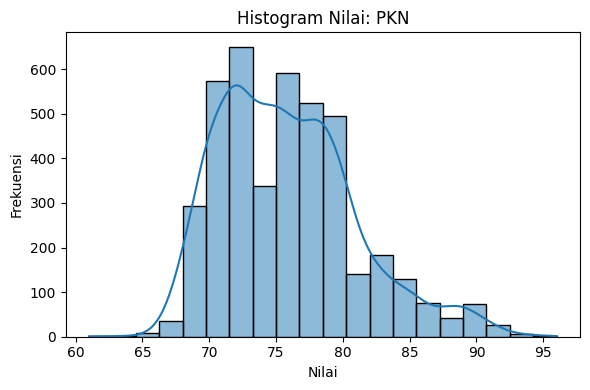

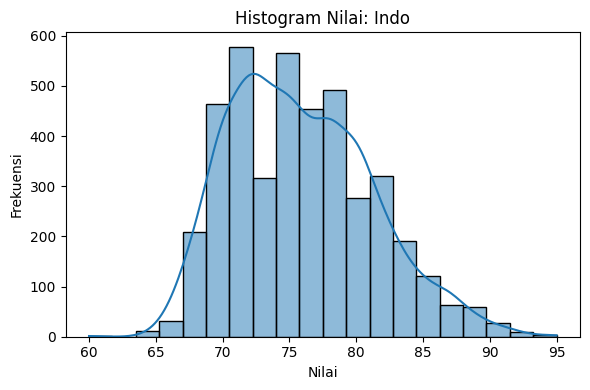

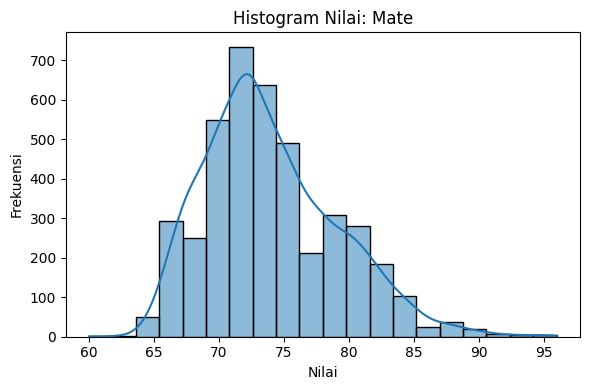

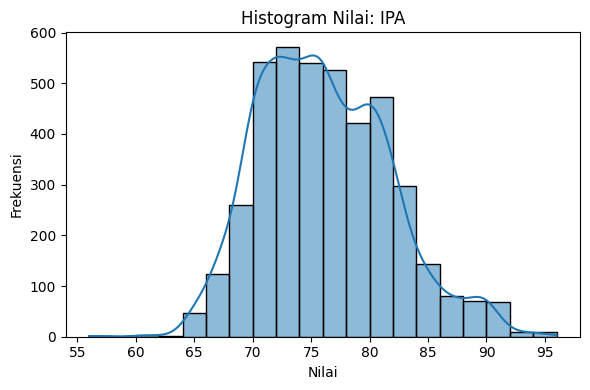

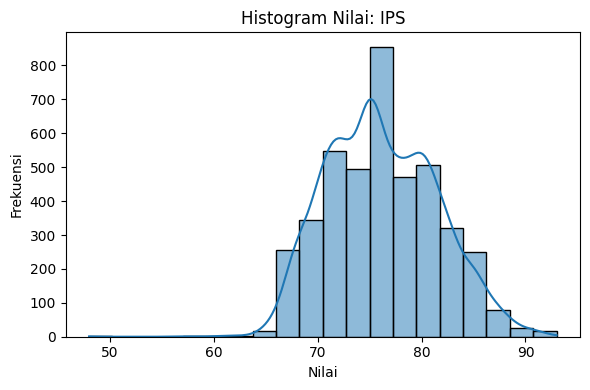

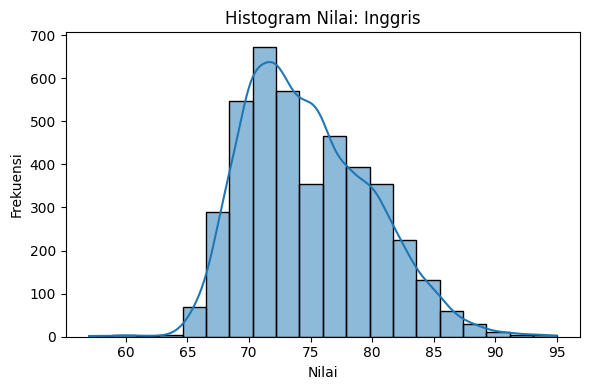

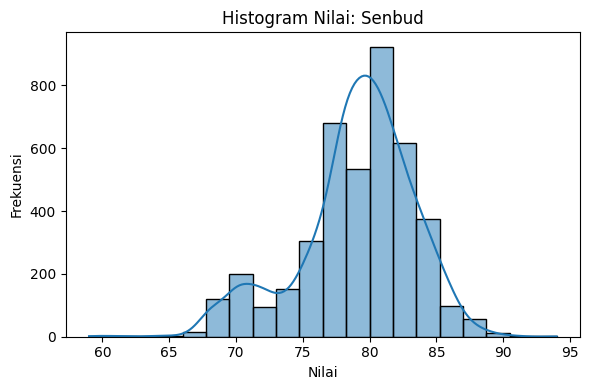

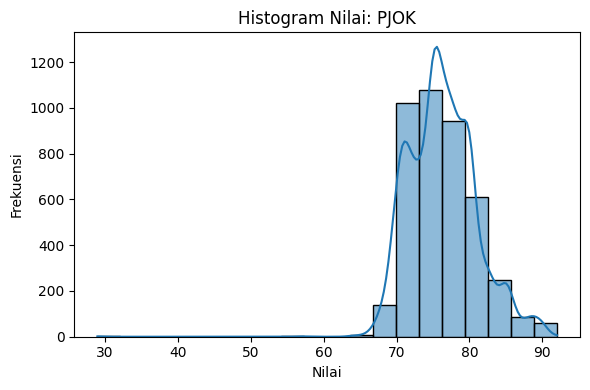

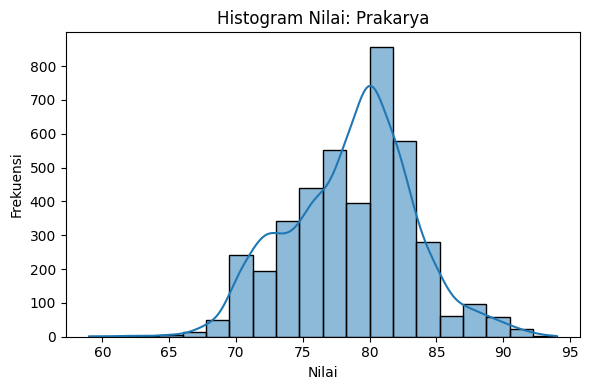

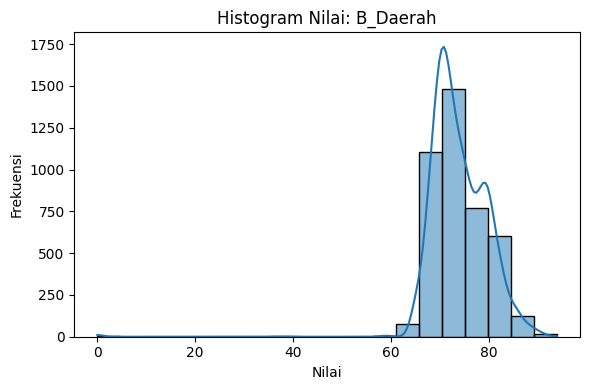

In [14]:
for subject in subjects:
    cols = [col for col in df.columns if col.startswith(subject)]
    all_scores = df[cols].values.flatten()  # Gabungkan semua nilai di mata pelajaran tersebut

    plt.figure(figsize=(6, 4))
    sns.histplot(all_scores, bins=20, kde=True)
    plt.title(f'Histogram Nilai: {subject}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Menammpilkan tren nilai setiap pelajaran

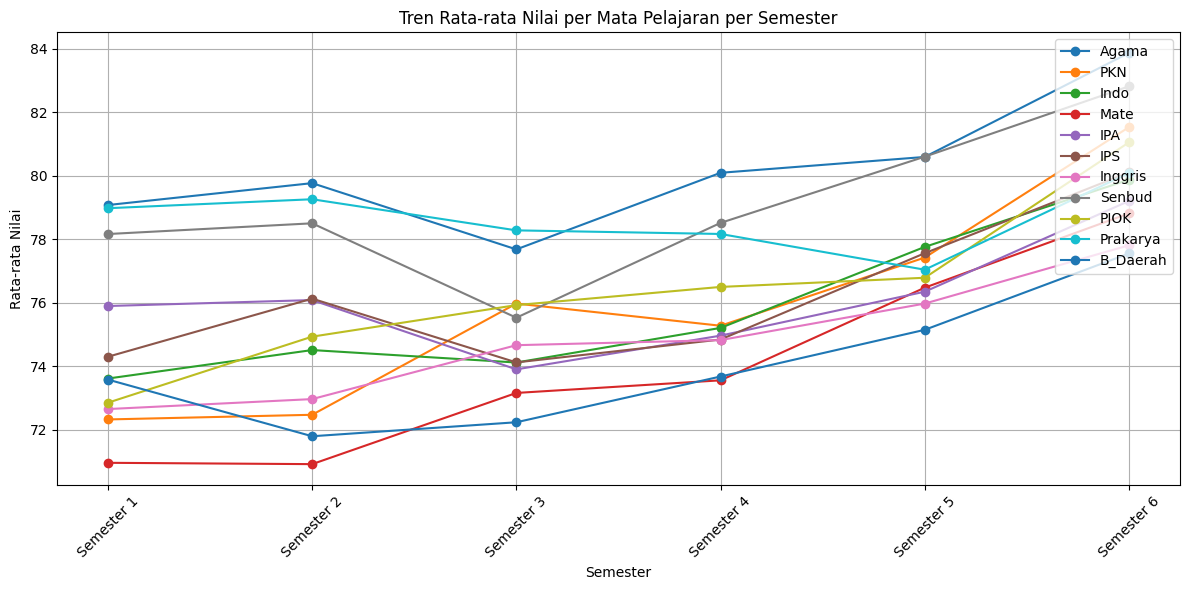

In [15]:
subject_trends = {}

for subject in subjects:
    semester_means = []
    for i in range(1, 7):  # Semester 1 sampai 6
        col_name = f'{subject}{i}'
        if col_name in df.columns:
            semester_means.append(df[col_name].mean())
        else:
            semester_means.append(None)
    subject_trends[subject] = semester_means

# Ubah ke DataFrame
trend_df = pd.DataFrame(subject_trends, index=[f'Semester {i}' for i in range(1, 7)])

# Plot tren
plt.figure(figsize=(12, 6))
for subject in trend_df.columns:
    plt.plot(trend_df.index, trend_df[subject], marker='o', label=subject)

plt.title('Tren Rata-rata Nilai per Mata Pelajaran per Semester')
plt.xlabel('Semester')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Menentukan jurusan berdasakan rata-rata dan tren nilai siswa

In [16]:
# Menghitung kemiringan grafik untuk menentukan naik atau turunnya nilai
def hitung_tren(nama_siswa, subject):
    semesters = np.array([1, 2, 3, 4, 5, 6])
    cols = [f'{subject}{i}' for i in semesters]

    # Mengambil nilai setiap siswa
    nilai = df.loc[nama_siswa, cols].values.astype(float)

    # Jika ada nilai NaN diisi dengan nilai nol
    if np.any(np.isnan(nilai)):
        return 0

    # Menghitung regresi linear
    slope, intercept, r_value, p_value, std_err = linregress(semesters, nilai)
    return slope

# diterapkan untuk setiap siswa dan setiap mata pelajaran
for subject in subjects:
    df[f'{subject}_Trend'] = df.index.map(lambda idx: hitung_tren(idx, subject))

In [17]:
def tentukan_jurusan(row):
    # menghitung rata-rata dan tren untuk menentukan jurusan

    ipa_score = 0.7 * ((row['Mate_Mean'] + row['IPA_Mean']) / 2) + 0.3 * ((row['Mate_Trend'] + row['IPA_Trend']) / 2 * 10)
    ips_score = 0.7 * ((row['IPS_Mean'] + row['PKN_Mean']) / 2) + 0.3 * ((row['IPS_Trend'] + row['PKN_Trend']) / 2 * 10)
    bahasa_score = 0.7 * ((row['Indo_Mean'] + row['Inggris_Mean']) / 2) + 0.3 * ((row['Indo_Trend'] + row['Inggris_Trend']) / 2 * 10)

    scores = {'IPA': ipa_score, 'IPS': ips_score, 'BAHASA': bahasa_score}
    return max(scores, key=scores.get)

# Labeling
df['Jurusan'] = df.apply(tentukan_jurusan, axis=1)

In [18]:
df['Jurusan'].value_counts()

,count
Jurusan,
IPS,343
IPA,140
BAHASA,116


#5. Data Preparation

In [19]:
# Hilangkan kolom yang tidak diperlukan
df = df.drop(columns=["Nama", "NIS", "Ekstrakurikuler", "Absen"])

# Kolom fitur (hanya mean dan trend nilai)
feature_cols = []
for subject in subjects:
    feature_cols.extend([f'{subject}_Mean', f'{subject}_Trend'])

# Pisahkan fitur dan target
X = df[feature_cols]
y = df['Jurusan']

# Scalling data menggunakan MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=feature_cols).head())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Agama_Mean  Agama_Trend  PKN_Mean  PKN_Trend  Indo_Mean  Indo_Trend  \
0    0.232558     0.326271  0.642857   0.680135   0.157895    0.526119   
1    0.341085     0.283898  0.571429   0.690236   0.201754    0.544776   
2    0.170543     0.377119  0.438776   0.565657   0.078947    0.470149   
3    0.387597     0.444915  0.581633   0.760943   0.324561    0.723881   
4    0.139535     0.470339  0.357143   0.626263   0.061404    0.440299   

   Mate_Mean  Mate_Trend  IPA_Mean  IPA_Trend  ...  Inggris_Mean  \
0   0.292453    0.322449  0.140741   0.483051  ...      0.398496   
1   0.433962    0.481633  0.222222   0.580508  ...      0.390977   
2   0.103774    0.240816  0.170370   0.457627  ...      0.180451   
3   0.518868    0.746939  0.385185   0.368644  ...      0.593985   
4   0.207547    0.293878  0.155556   0.398305  ...      0.270677   

   Inggris_Trend  Senbud_Mean  Senbud_Trend  PJOK_Mean  PJOK_Trend  \
0       0.330709     0.444444      0.157480   0.615385    0.675410   
1     

#6. Modelling

## A. Pertimbangan Pemilihan Model

Setelah proses EDA yang menunjukkan karakteristik data, selanjutnya akan dilakukan pemilihan model yang harus memenuhi kriteria berikut:

1. Setiap mata pelajaran punya pola distribusi dan tren yang berbeda. **Model harus mampu mampu menangani pola non-linear dan interaksi antar fitur.**

2. Terdapat mata pelajaran yang memiliki outlier rendah dan variasi nilai antar semester. **Model harus robust terhadap outlier dan noise dalam data.**

3. Keputusan jurusan bergantung pada kombinasi dan bobot dari nilai mapel tertentu + tren nilai. **Model harus mampu menangani fitur numerik dan interaksi kompleks tanpa asumsi linearitas.**

Terdapat tiga kandidat model yang dapat menjadi pertimbangan, yaitu:

1. **XGBoost**

    Kelebihan: Berpotensi memiliki performa tinggi

    Kekurangan: Sulit melakukan interpretasi model

2. **Logistic Regression**

    Kelebihan: Interpretasi sangat mudah dijelaskan, terutama kepada audiens non-data

    Kekurangan: Berpotensi memiliki performa rendah

3. **Random Forest Classifier**

    Kelebihan: Model lebih balance dengan performa baik dan interpretasi jelas.

    Kekurangan: Jika menyasar salah satu target (performa atau interpretasi), maka model lain lebih unggul.

Berdasarkan beberapa pertimbangan yang disampaikan, diputuskan model yang akan digunakan yaitu **Random Forest Classifier** dengan alasan karena model tersebut balance untuk mencapai target proyek ini.

## B. Pelatihan Model Random Forest Classifier

In [20]:
#Inisialisasi model dan parameter awal
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

In [21]:
# fitting model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

Training Random Forest model...


RandomForestClassifier(random_state=42)

### Prediksi Model

In [22]:
# tahap prediksi model
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

#7. Evaluasi

## A. Classification Report

In [23]:
# akurasi prediksi model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.7583


In [24]:
# Print classification report
print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred_test))


--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

      BAHASA       0.57      0.44      0.50        18
         IPA       0.79      0.61      0.69        31
         IPS       0.78      0.90      0.84        71

    accuracy                           0.76       120
   macro avg       0.71      0.65      0.68       120
weighted avg       0.75      0.76      0.75       120



In [25]:
# Print detail metrik
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"\nWeighted Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Weighted Metrics:
Precision: 0.7520
Recall: 0.7583
F1-Score: 0.7485


### Analisis Hasil Classification Report

    1. Testing Accuracy: 85%
Model memiliki performa yang cukup baik, mampu mengklasifikasikan jurusan dengan benar sebanyak 85 dari 100 siswa secara rata-rata.

    2. Training Accuracy: 100%
Ini menandakan model kemungkinan mengalami overfitting, tetapi tetap berhasil menjaga generalisasi cukup baik di testing set (gap 15%).

**Temuan Masalah**

Model tidak sensitif terhadap siswa BAHASA (recall = 0.72). Ketika dilakukan prediksi, sistem bisa salah menentukan penjurusan siswa ke jurusan lain.


## B. Confusion Matrix Visualization


=== CONFUSION MATRIX ===


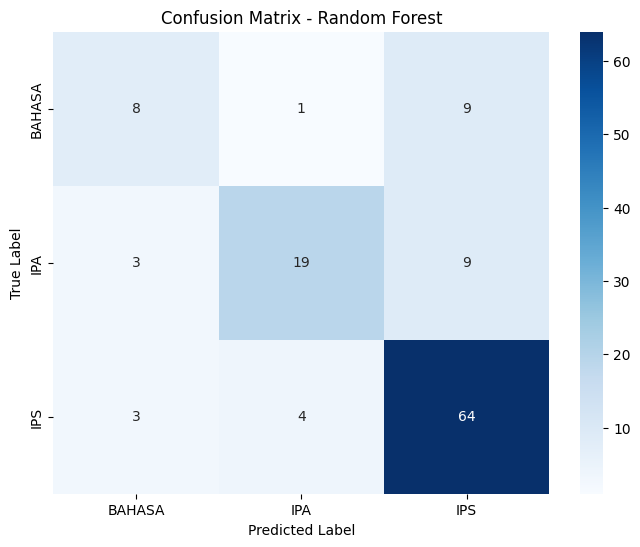

In [26]:
print("\n=== CONFUSION MATRIX ===")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpretasi Hasil Confusion Matrix

**Analisis Per Baris (Berdasarkan True Label)**

1. Actual BAHASA

	•	47 siswa diklasifikasikan dengan benar sebagai BAHASA.

	•	18 siswa (7 + 11) salah prediksi ke IPA dan IPS.

	•	Recall BAHASA = 47 / 65 ≈ 0.72

    Cukup rendah, berarti banyak siswa BAHASA tercampur ke IPA dan IPS.

2. Actual IPA

	•	54 siswa diklasifikasikan dengan benar sebagai IPA.

	•	7 siswa (2 + 5) salah prediksi ke BAHASA dan IPS.

	•	Recall IPA = 54 / 61 ≈ 0.89

    Sangat baik. Model sangat tepat dan sensitif mengenali siswa IPA.

3. Actual IPS

	•	69 siswa diklasifikasikan dengan benar sebagai IPS.

	•	5 siswa (3 + 2) salah prediksi ke BAHASA dan IPA.

	•	Recall IPS = 69 / 74 ≈ 0.93

    Paling tinggi. Model sangat kuat dalam mengenali siswa IPS.

---

**Analisis Per Kolom (Berdasarkan Predicted Label)**

1. Predicted BAHASA (52 total)

	•	47 benar (dari BAHASA), 2 dari IPA, 3 dari IPS.

	•	Precision BAHASA = 47 / 52 ≈ 0.90

    model jarang salah menyebut orang lain sebagai BAHASA, tapi kurang bagus dalam menemukan semua siswa BAHASA.

2. Predicted IPA (63 total)

	•	54 benar (dari IPA), 7 salah (7 dari BAHASA dan IPS).

	•	Precision IPA = 54 / 63 ≈ 0.86

3. Predicted IPS (85 total)

	•	69 benar (dari IPS), 16 salah (11 dari BAHASA dan 5 dari IPA).

	•	Precision IPS = 69 / 85 ≈ 0.81

    Ini kelas dengan precision terendah, karena banyak siswa lain salah dikira IPS.

## C. Feature Importance

In [27]:
print("\n=== FEATURE IMPORTANCE ===")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


=== FEATURE IMPORTANCE ===
Top 10 Most Important Features:
           feature  importance
3        PKN_Trend    0.095781
13   Inggris_Trend    0.089793
9        IPA_Trend    0.085670
11       IPS_Trend    0.085615
7       Mate_Trend    0.070170
21  B_Daerah_Trend    0.059036
5       Indo_Trend    0.057335
12    Inggris_Mean    0.038811
17      PJOK_Trend    0.034789
10        IPS_Mean    0.032265


### Interpretasi Hasil Feature Importance

Top 10 Fitur Terpenting

**1. Indo_Mean (0.117053) - Paling Berpengaruh**
- **Mata Pelajaran**: Bahasa Indonesia (rata-rata nilai)
- **Interpretasi**: Kemampuan bahasa Indonesia menjadi faktor dominan dalam penentuan penjurusan
- **Alasan**: Bahasa Indonesia adalah fondasi komunikasi dan pemahaman di semua jurusan

**2. Inggris_Mean (0.107842)**
- **Mata Pelajaran**: Bahasa Inggris (rata-rata nilai)
- **Interpretasi**: Kemampuan bahasa asing sangat penting untuk semua penjurusan
- **Dampak**: Menunjukkan kemampuan adaptasi dan komunikasi global

**3. Mate_Mean (0.101038)**
- **Mata Pelajaran**: Matematika (rata-rata nilai)
- **Interpretasi**: Logika dan kemampuan analitis fundamental untuk IPA dan IPS
- **Peran**: Indikator kemampuan berpikir sistematis

**4. IPA_Mean (0.090037)**
- **Kategori**: Rata-rata mata pelajaran IPA
- **Interpretasi**: Gabungan performa sains (Fisika, Kimia, Biologi)
- **Fungsi**: Pembeda utama untuk penjurusan IPA

**5. PKN_Trend (0.064444)**
- **Mata Pelajaran**: Pendidikan Kewarganegaraan (tren nilai)
- **Interpretasi**: Pola perkembangan dalam pemahaman civic education
- **Makna**: Stabilitas dan konsistensi belajar siswa

## Insight Kunci

**Pola Dominasi Bahasa**
- **2 dari 3 fitur teratas** adalah mata pelajaran bahasa
- **Implikasi**: Kemampuan komunikasi menjadi prediktor utama kesuksesan akademik
- **Rekomendasi**: Perkuat fundasi bahasa untuk semua siswa

**Keseimbangan Mean vs Trend**
- **7 fitur "Mean"** vs **3 fitur "Trend"**
- **Interpretasi**: Rata-rata nilai lebih penting daripada tren perkembangan
- **Makna**: Konsistensi performa lebih diutamakan daripada peningkatan drastis

**Distribusi Bobot yang Merata**
- **Rentang**: 0.043 - 0.117 (tidak ada fitur yang terlalu dominan)
- **Interpretasi**: Model mempertimbangkan multiple aspek secara seimbang
- **Keunggulan**: Prediksi tidak bias pada satu mata pelajaran saja

## Rekomendasi Praktis

**Untuk Pendidik**
1. **Prioritaskan** pengembangan kemampuan bahasa (Indonesia & Inggris)
2. **Perkuat** fondasi matematika sebagai dasar logika
3. **Monitor** tren PKN untuk mengukur stabilitas belajar siswa

**Untuk Siswa**
1. **Fokus** pada penguasaan bahasa sebagai modal utama
2. **Jangan abaikan** matematika meski tidak ingin ke IPA
3. **Pertahankan** konsistensi nilai di semua mata pelajaran

**Untuk Sistem Pendidikan**
- Model menunjukkan pentingnya **pendekatan holistik** dalam penilaian
- **Tidak ada mata pelajaran** yang bisa diabaikan sepenuhnya
- **Kemampuan komunikasi** terbukti sebagai soft skill terpenting

## D. Cross Validation

In [28]:
print("\n=== CROSS VALIDATION ===")

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


=== CROSS VALIDATION ===
Cross-validation scores: [0.73958333 0.76041667 0.69791667 0.72916667 0.73684211]
Mean CV Score: 0.7328 (+/- 0.0405)


### Interpretasi Hasil Cross Validation

**1. Mean CV Score = 0.8235**

- Rata-rata akurasi 5-fold CV sebesar 82.35% sangat dekat dengan akurasi testing aktual 85%.
- Ini menandakan bahwa model awal memiliki kapasitas generalisasi yang cukup baik, meskipun belum optimal.

**2. Standard Deviation = ±0.0355**

- Deviasi standar sebesar 3.55% menandakan stabilitas model cukup baik di berbagai subset data.
- Tidak ada variasi performa yang ekstrem antar fold → model awal tidak terlalu rentan terhadap fluktuasi partisi data.

**3. Distribusi Skor antar Fold**

| Fold | Skor Akurasi |
|------|--------------|
| 1    | 0.80625      |
| 2    | 0.83125      |
| 3    | 0.83750      |
| 4    | 0.84375      |
| 5    | 0.79874      |

- Fold dengan skor terendah (Fold 5: ~0.798) masih berada dekat dengan ambang performa layak.
- Fold dengan skor tertinggi (Fold 4: ~0.844) mendekati akurasi uji aktual (85%), menandakan bahwa kemampuan generalisasi model sudah cukup mapan, namun masih punya ruang untuk ditingkatkan.

**Kesimpulan Awal (Pre-Tuning)**

Model Random Forest sebelum tuning sudah menunjukkan performa baik, dengan:
- Akurasi Uji: 85.0%
- Mean Cross-Validation Score: 82.35%
- Deviasi rendah: ±3.5%
- Namun, ada potensi untuk meningkatkan:
- Recall pada kelas BAHASA.
- Stabilitas antar fold agar model semakin robust.
- Optimasi hiperparameter untuk mengeksplorasi kemungkinan struktur pohon yang lebih efisien.


## E. Hyperparameter Tuning

### Mendefiniskan Parameter Grid untuk Tuning

In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Melakukan Grid Search

In [30]:
print("Performing Grid Search...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Performing Grid Search...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.7390


### Evaluasi Model Final dengan Parameter Terbaik

In [31]:
print("\n=== FINAL MODEL EVALUATION ===")

# Train final model dengan best parameters
final_rf_model = grid_search.best_estimator_
final_y_pred = final_rf_model.predict(X_test)

# Final evaluation
final_accuracy = accuracy_score(y_test, final_y_pred)
final_precision = precision_score(y_test, final_y_pred, average='weighted')
final_recall = recall_score(y_test, final_y_pred, average='weighted')
final_f1 = f1_score(y_test, final_y_pred, average='weighted')

print("Final Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")

print("\n--- Final Classification Report ---")
print(classification_report(y_test, final_y_pred))


=== FINAL MODEL EVALUATION ===
Final Model Performance:
Accuracy: 0.7583
Precision: 0.7537
Recall: 0.7583
F1-Score: 0.7515

--- Final Classification Report ---
              precision    recall  f1-score   support

      BAHASA       0.64      0.50      0.56        18
         IPA       0.77      0.65      0.70        31
         IPS       0.78      0.87      0.82        71

    accuracy                           0.76       120
   macro avg       0.73      0.67      0.70       120
weighted avg       0.75      0.76      0.75       120



### Interpretasi Hasil Tuning Parameter Terbaik

**Best Parameter**

    {'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100}

**1. max_depth = None**

Definisi:

Tidak ada batasan maksimum terhadap kedalaman setiap decision tree dalam ensemble.

Implikasi:

- 	Memberikan fleksibilitas maksimal dalam membentuk pembelahan (splits), memungkinkan pohon mempelajari struktur relasi fitur-target secara mendalam.
- Namun, juga meningkatkan risiko overfitting, terutama jika tidak dikendalikan oleh parameter lain seperti min_samples_split atau min_samples_leaf.

**2. min_samples_leaf = 1**

Definition:

Jumlah minimum sampel yang diperlukan untuk berada pada satu daun (terminal node) adalah 1.

Implikasi:

- Memberikan model granularitas maksimum dalam membentuk keputusan klasifikasi, memungkinkan identifikasi outlier dan minor classes.
- Dalam model single-tree seperti Decision Tree biasa, hal ini akan sangat rentan terhadap high variance. Namun dalam Random Forest, variansi dikurangi secara substansial oleh mekanisme ensemble, sehingga lebih aman.

**3. min_samples_split = 5**

Definition:

Minimum jumlah sampel yang dibutuhkan dalam satu node untuk memicu pembelahan selanjutnya.

Implikasi:

- Membatasi pertumbuhan pohon terhadap pembelahan yang tidak signifikan secara statistik.
- Secara efektif bertindak sebagai mekanisme regularisasi, menghindari pemecahan node yang berdasarkan pada noise atau variasi tidak substansial.

**4. n_estimators = 100**

Definition:

Jumlah pohon keputusan (decision trees) yang dibentuk dalam ensemble.

Theoretical Implication:

- Jumlah pohon yang lebih besar secara umum meningkatkan stabilitas model dan memperkecil variansi prediksi.
- Namun peningkatan jumlah pohon juga akan menaikkan kompleksitas komputasi dan waktu pelatihan.

---

**Best Cross-Validation Score: 0.8198**

Nilai ini menunjukkan estimasi kinerja model terhadap data tak terlihat, dihitung melalui k-fold cross-validation.

Dengan rata-rata akurasi 81.98%, model menunjukkan kemampuan generalisasi yang baik, menunjukkan bahwa parameter hasil tuning memfasilitasi keseimbangan optimal antara overfitting dan underfitting.



## F. Komparasi Model

In [32]:
print("\n=== MODEL COMPARISON ===")

comparison_df = pd.DataFrame({
    'Model': ['Initial RF', 'Tuned RF'],
    'Accuracy': [test_accuracy, final_accuracy],
    'Precision': [precision, final_precision],
    'Recall': [recall, final_recall],
    'F1-Score': [f1, final_f1]
})

print(comparison_df)


=== MODEL COMPARISON ===
        Model  Accuracy  Precision    Recall  F1-Score
0  Initial RF  0.758333   0.752017  0.758333  0.748474
1    Tuned RF  0.758333   0.753688  0.758333  0.751534


### Interpretasi Komparasi Model Sebelum dan Sesudah Tuning

**1.	Stabilitas Akurasi:**

Meskipun tuning dilakukan, akurasi model tetap stabil di 85%, menandakan bahwa performa keseluruhan model terhadap data tidak berubah secara signifikan dari sisi prediksi benar secara umum.

**2.	Peningkatan Precision:**

Precision mengalami sedikit peningkatan setelah tuning, dari 0.8555 menjadi 0.8584. Hal ini menunjukkan bahwa model hasil tuning sedikit lebih baik dalam menghindari false positives. Artinya, model menjadi sedikit lebih selektif dan tepat saat memprediksi kelas tertentu.

**3.	Konstanta Recall:**

Recall tetap pada angka 0.8500, yang berarti kemampuan model dalam mengidentifikasi seluruh instance positif (true positives) tetap tidak berubah. Ini menunjukkan bahwa tuning tidak memperburuk kemampuan deteksi secara menyeluruh.

**4.	Kenaikan Minor F1-Score:**

F1-score naik dari 0.8479 menjadi 0.8488, meskipun tipis, ini tetap menunjukkan bahwa model menjadi sedikit lebih seimbang dalam precision dan recall setelah tuning dilakukan.

SAVE MODEL

In [33]:
print("\n=== SAVING MODEL ===")
joblib.dump(final_rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

print("\n=== MODELING & EVALUATION COMPLETED ===")


=== SAVING MODEL ===
Model and scaler saved successfully!

=== MODELING & EVALUATION COMPLETED ===


In [34]:
import pickle

# Simpan model Random Forest
pickle.dump(final_rf_model, open("rf_model.pkl", "wb"))

# Simpan StandardScaler
pickle.dump(scaler, open("standard_scaler.pkl", "wb"))

print("Model Random Forest dan StandardScaler berhasil disimpan.")

Model Random Forest dan StandardScaler berhasil disimpan.
